## 1. The most Nobel of Prizes
<p><img style="float: right;margin:5px 20px 5px 1px; max-width:250px" src="https://assets.datacamp.com/production/project_441/img/Nobel_Prize.png"></p>
<p>The Nobel Prize is perhaps the world's most well known scientific award. Except for the honor, prestige and substantial prize money the recipient also gets a gold medal showing Alfred Nobel (1833 - 1896) who established the prize. Every year it's given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. The first Nobel Prize was handed out in 1901, and at that time the Prize was very Eurocentric and male-focused, but nowadays it's not biased in any way whatsoever. Surely. Right?</p>
<p>Well, we're going to find out! The Nobel Foundation has made a dataset available of all prize winners from the start of the prize, in 1901, to 2016. Let's load it in and take a look.</p>

In [16]:
# Loading in required libraries
# ... YOUR CODE FOR TASK 1 ...
import pandas as pd
import seaborn as sns
import numpy as np
# Reading in the Nobel Prize data
nobel = pd.read_csv('datasets/nobel.csv')

# Taking a look at the first several winners
# ... YOUR CODE FOR TASK 1 ...
nobel.head(6)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany


## 2. So, who gets the Nobel Prize?
<p>Just looking at the first couple of prize winners, or Nobel laureates as they are also called, we already see a celebrity: Wilhelm Conrad Röntgen, the guy who discovered X-rays. And actually, we see that all of the winners in 1901 were guys that came from Europe. But that was back in 1901, looking at all winners in the dataset, from 1901 to 2016, which sex and which country is the most commonly represented? </p>
<p>(For <em>country</em>, we will use the <code>birth_country</code> of the winner, as the <code>organization_country</code> is <code>NaN</code> for all shared Nobel Prizes.)</p>

In [17]:
# Display the number of (possibly shared) Nobel Prizes handed
# out between 1901 and 2016
# ... YOUR CODE FOR TASK 2 ...
display(len(nobel))
# Display the number of prizes won by male and female recipients.
# ... YOUR CODE FOR TASK 2 ...
display(nobel['sex'].value_counts())
# Display the number of prizes won by the top 10 nationalities.
# ... YOUR CODE FOR TASK 2 ...
nobel['birth_country'].value_counts().head(10)

911

Male      836
Female     49
Name: sex, dtype: int64

United States of America    259
United Kingdom               85
Germany                      61
France                       51
Sweden                       29
Japan                        24
Canada                       18
Netherlands                  18
Italy                        17
Russia                       17
Name: birth_country, dtype: int64

## 3. USA dominance
<p>Not so surprising perhaps: the most common Nobel laureate between 1901 and 2016 was a man born in the United States of America. But in 1901 all the winners were European. When did the USA start to dominate the Nobel Prize charts?</p>

In [18]:
# Calculating the proportion of USA born winners per decade
nobel['usa_born_winner'] = nobel['birth_country'].apply(lambda x: True if x=="United States of America" else False)
nobel['decade'] = pd.Series(np.floor(nobel['year']).astype('int64'))
prop_usa_winners = nobel.groupby('decade', as_index=False)['usa_born_winner'].mean()

# Display the proportions of USA born winners per decade
# ... YOUR CODE FOR TASK 3 ...
print(prop_usa_winners)

     decade  usa_born_winner
0      1901         0.000000
1      1902         0.000000
2      1903         0.000000
3      1904         0.000000
4      1905         0.000000
..      ...              ...
108    2012         0.500000
109    2013         0.384615
110    2014         0.230769
111    2015         0.090909
112    2016         0.090909

[113 rows x 2 columns]


## 4. USA dominance, visualized
<p>A table is OK, but to <em>see</em> when the USA started to dominate the Nobel charts we need a plot!</p>

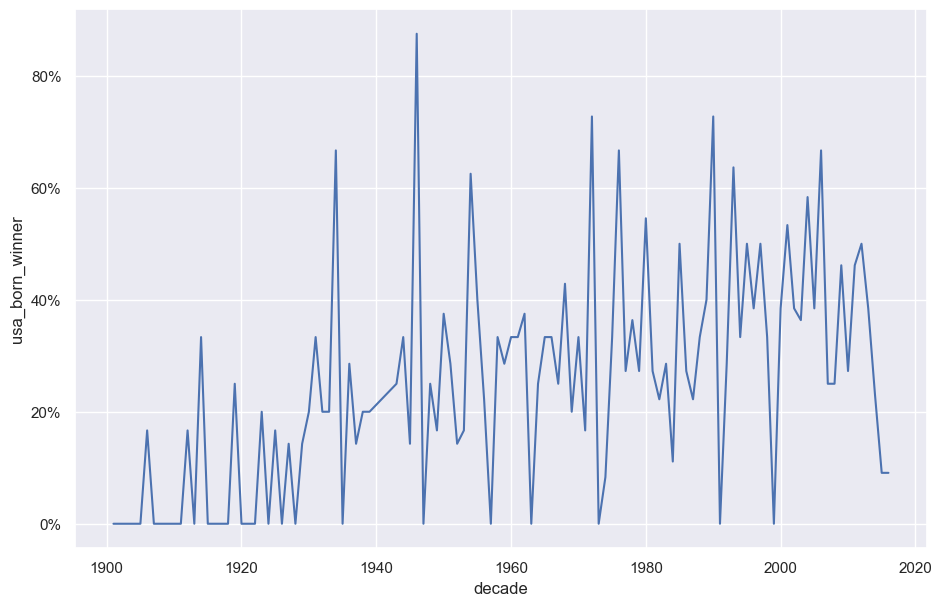

In [19]:
# Setting the plotting theme
sns.set()
# and setting the size of all plots.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [11, 7]

# Plotting USA born winners 
ax = sns.lineplot(x=prop_usa_winners['decade'], y=prop_usa_winners['usa_born_winner'])

# Adding %-formatting to the y-axis
from matplotlib.ticker import PercentFormatter
# ... YOUR CODE FOR TASK 4 ...
yticks=PercentFormatter(1)
ax.yaxis.set_major_formatter(yticks)


## 5. What is the gender of a typical Nobel Prize winner?
<p>So the USA became the dominating winner of the Nobel Prize first in the 1930s and had kept the leading position ever since. But one group that was in the lead from the start, and never seems to let go, are <em>men</em>. Maybe it shouldn't come as a shock that there is some imbalance between how many male and female prize winners there are, but how significant is this imbalance? And is it better or worse within specific prize categories like physics, medicine, literature, etc.?</p>

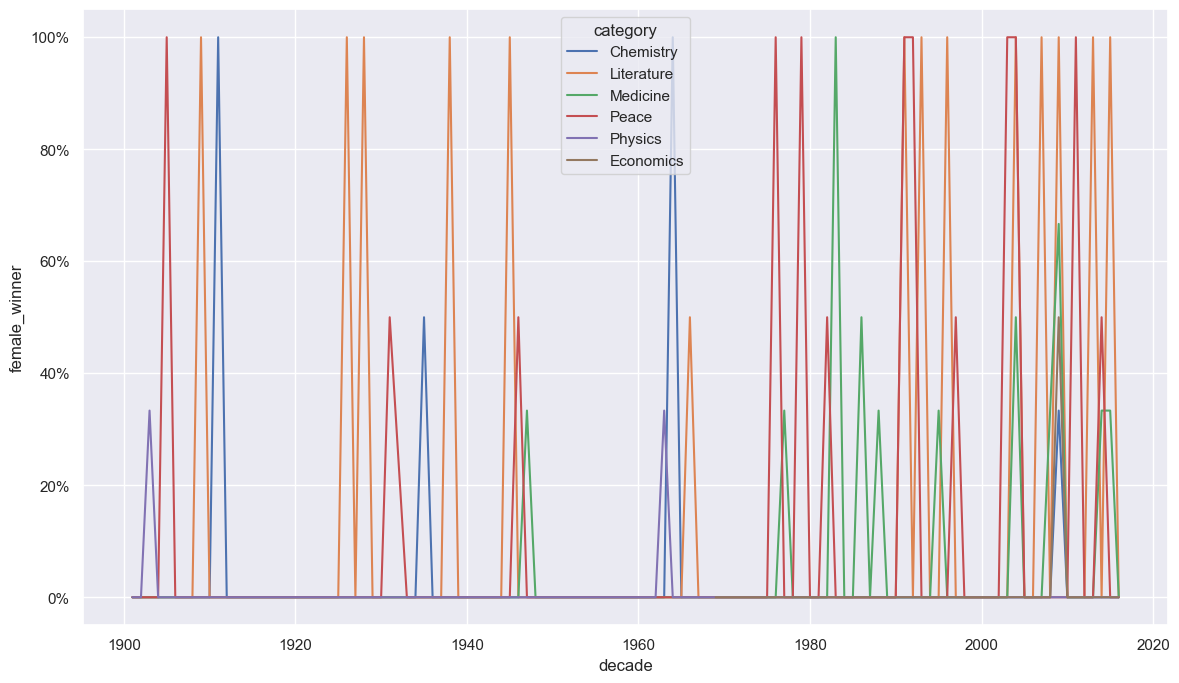

In [46]:
# Calculating the proportion of female laureates per decade
nobel['female_winner'] = nobel['sex'].apply(lambda x: True if x=='Female' else False)
prop_female_winners = nobel.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()

# Plotting USA born winners with % winners on the y-axis
# ... YOUR CODE FOR TASK 5 ...
# Setting the plotting theme
sns.set()
# and setting the size of all plots.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [14, 8]

# Plotting USA born winners 
ax = sns.lineplot(x=prop_female_winners['decade'], y=prop_female_winners['female_winner'], hue=prop_female_winners['category'])

# Adding %-formatting to the y-axis
from matplotlib.ticker import PercentFormatter
# ... YOUR CODE FOR TASK 4 ...
yticks=PercentFormatter(1)
ax.yaxis.set_major_formatter(yticks)

## 6. How many female winners are there over the years
<p>The plot above is a bit messy as the lines are overplotting. But it does show some interesting trends and patterns. Overall the imbalance is pretty large with physics, economics, and chemistry having the largest imbalance. Medicine has a somewhat positive trend, and since the 1990s There has been more female winners than the time period before that so let's see the number and visualize it with a line plot.</p>


<AxesSubplot: xlabel='year'>

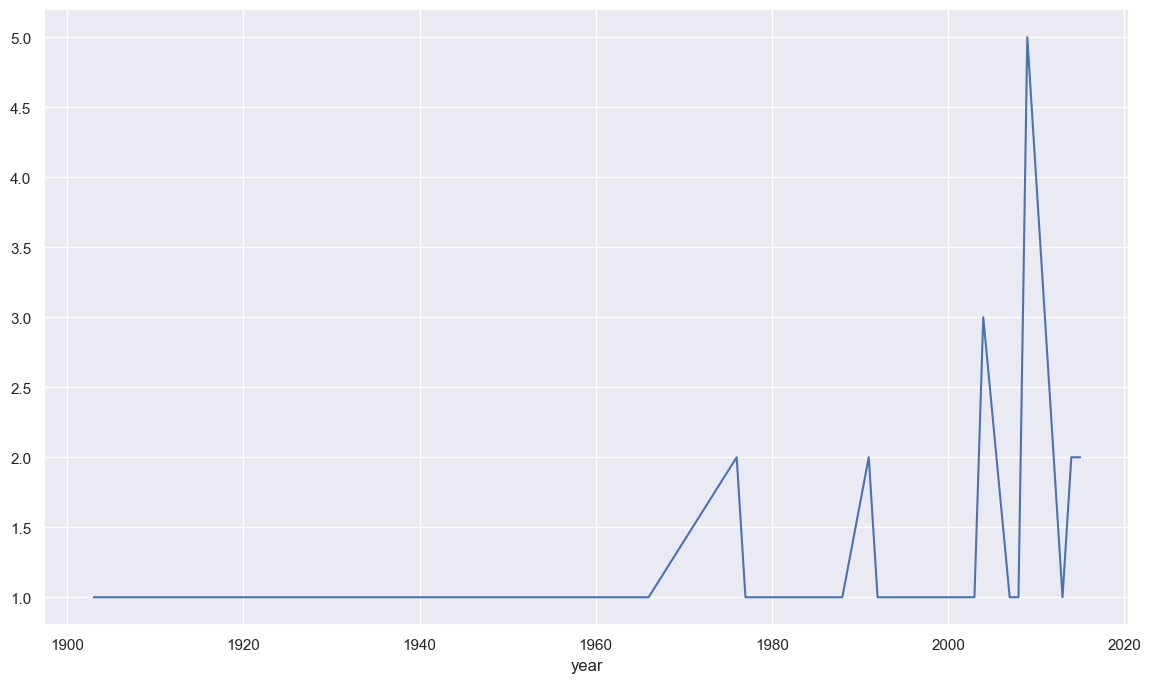

In [48]:
nobel[nobel['sex']=='Female'].groupby('year').size().plot()

The most Nobel Prizes awarded to women in a single year was in 2009, when five women became laureates in four categories.


## 4. The first woman to win the Nobel Prize
<p>Given this imbalance, who was the first woman to receive a Nobel Prize? And in what category?</p>

In [21]:
# Picking out the first woman to win a Nobel Prize
# ... YOUR CODE FOR TASK 5 ...
nobel[nobel['sex']=='Female'].nsmallest(1, 'year')

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1903,True


## 8. Repeat laureates
<p>For most scientists/writers/activists a Nobel Prize would be the crowning achievement of a long career. But for some people, one is just not enough, and few have gotten it more than once. Who are these lucky few? (Having won no Nobel Prize myself, I'll assume it's just about luck.)</p>

In [22]:
# Selecting the laureates that have received 2 or more prizes.
# ... YOUR CODE FOR TASK 5 ...
nobel.groupby('full_name').filter(lambda x: len(x) > 1)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1903,True
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,False,1911,True
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1917,False
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1944,False
278,1954,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemi...",1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1954,False
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1954,False
298,1956,Physics,The Nobel Prize in Physics 1956,"""for their researches on semiconductors and th...",1/3,66,Individual,John Bardeen,1908-05-23,"Madison, WI",United States of America,Male,University of Illinois,"Urbana, IL",United States of America,1991-01-30,"Boston, MA",United States of America,True,1956,False
306,1958,Chemistry,The Nobel Prize in Chemistry 1958,"""for his work on the structure of proteins, es...",1/1,222,Individual,Frederick Sanger,1918-08-13,Rendcombe,United Kingdom,Male,University of Cambridge,Cambridge,United Kingdom,2013-11-19,Cambridge,United Kingdom,False,1958,False
340,1962,Peace,The Nobel Peace Prize 1962,NaN,1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1962,False
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1963,False


## 9. How old are you when you get the prize?
<p>The list of repeat winners contains some illustrious names! We again meet Marie Curie, who got the prize in physics for discovering radiation and in chemistry for isolating radium and polonium. John Bardeen got it twice in physics for transistors and superconductivity, Frederick Sanger got it twice in chemistry, and Linus Carl Pauling got it first in chemistry and later in peace for his work in promoting nuclear disarmament. We also learn that organizations also get the prize as both the Red Cross and the UNHCR have gotten it twice.</p>
<p>But how old are you generally when you get the prize?</p>

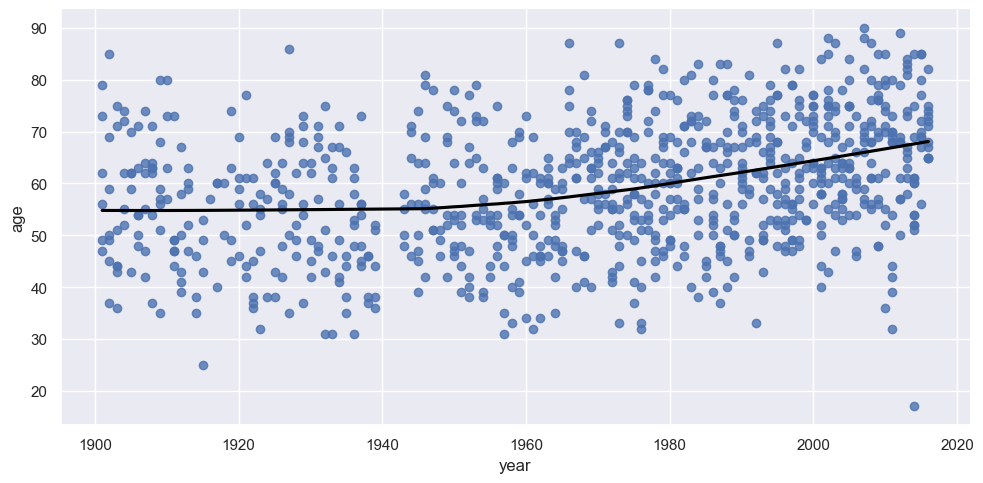

In [23]:
# Converting birth_date from String to datetime
nobel['birth_date'] = pd.to_datetime(nobel['birth_date'])

# Calculating the age of Nobel Prize winners
nobel['age'] = nobel['year'] - nobel['birth_date'].dt.year 

# Plotting the age of Nobel Prize winners
sns.lmplot(x='year', y='age', data=nobel, lowess=True, aspect=2,line_kws={'color' : 'black'})

## 10. Age differences between prize categories
<p>The plot above shows us a lot! We see that people use to be around 55 when they received the price, but nowadays the average is closer to 65. But there is a large spread in the laureates' ages, and while most are 50+, some are very young.</p>
<p>We also see that the density of points is much high nowadays than in the early 1900s -- nowadays many more of the prizes are shared, and so there are many more winners. We also see that there was a disruption in awarded prizes around the Second World War (1939 - 1945). </p>
<p>Let's look at age trends within different prize categories.</p>

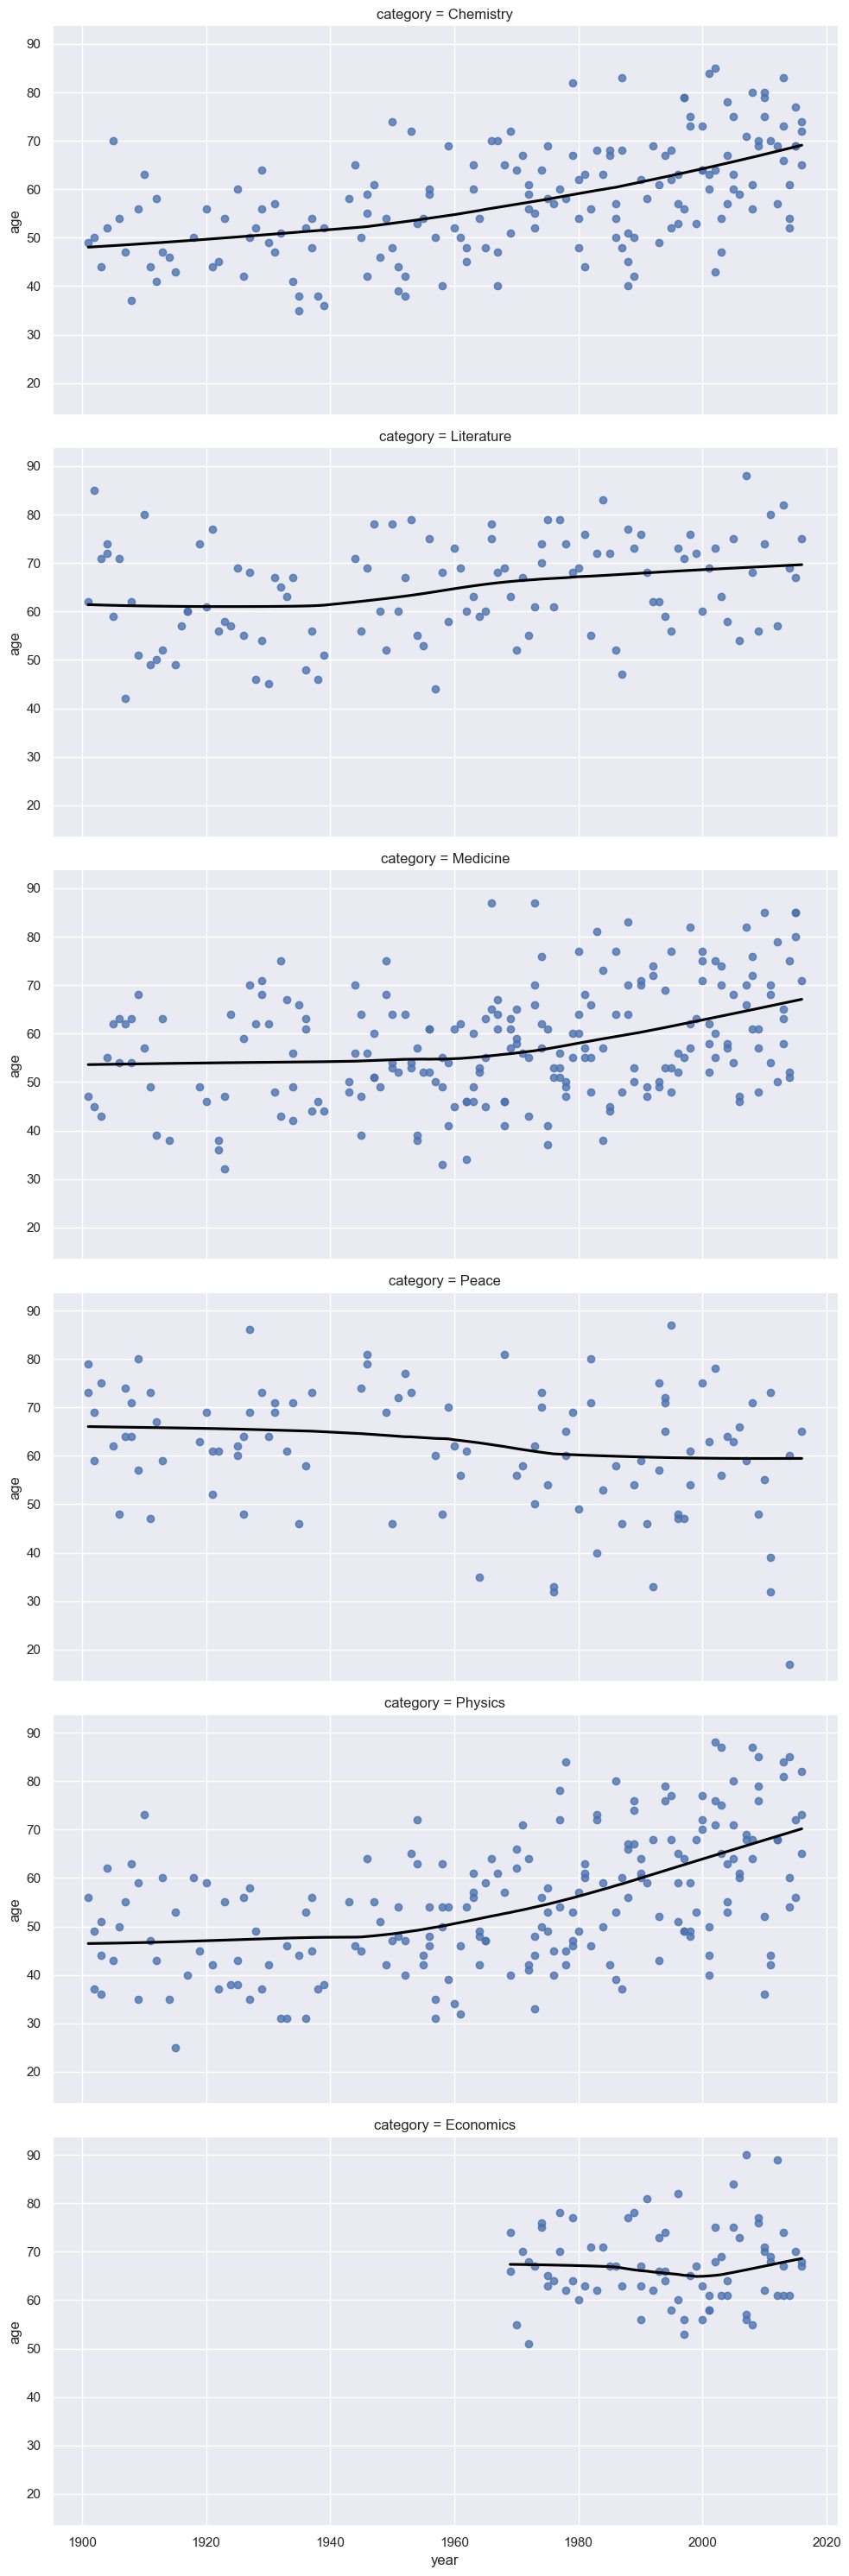

In [24]:
# Same plot as above, but separate plots for each type of Nobel Prize
# ... YOUR CODE FOR TASK 9 ...
sns.lmplot(x='year', y='age', row='category', data=nobel, lowess=True, aspect=2,line_kws={'color' : 'black'})

## 11. Oldest and youngest winners
<p>More plots with lots of exciting stuff going on! We see that both winners of the chemistry, medicine, and physics prize have gotten older over time. The trend is strongest for physics: the average age used to be below 50, and now it's almost 70. Literature and economics are more stable. We also see that economics is a newer category. But peace shows an opposite trend where winners are getting younger! </p>
<p>In the peace category we also a winner around 2010 that seems exceptionally young. This begs the questions, who are the oldest and youngest people ever to have won a Nobel Prize?</p>

In [25]:
# The oldest winner of a Nobel Prize as of 2016
# ... YOUR CODE FOR TASK 10 ...
display(nobel.nlargest(1, 'age'))
# The youngest winner of a Nobel Prize as of 2016
# ... YOUR CODE FOR TASK 10 ...
nobel.nsmallest(1, 'age')

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,age
793,2007,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having laid the foundations of mechanism ...",1/3,820,Individual,Leonid Hurwicz,1917-08-21,Moscow,Russia,Male,University of Minnesota,"Minneapolis, MN",United States of America,2008-06-24,"Minneapolis, MN",United States of America,False,2007,False,90.0


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Female,NaN,NaN,NaN,NaN,NaN,NaN,False,2014,True,17.0


## 11. You get a prize!
<p><img style="float: right;margin:20px 20px 20px 20px; max-width:200px" src="https://assets.datacamp.com/production/project_441/img/paint_nobel_prize.png"></p>
<p>Hey! You get a prize for making it to the very end of this notebook! It might not be a Nobel Prize, but I made it myself in paint so it should count for something. But don't despair, Leonid Hurwicz was 90 years old when he got his prize, so it might not be too late for you. Who knows.</p>
<p>Before you leave, what was again the name of the youngest winner ever who in 2014 got the prize for "[her] struggle against the suppression of children and young people and for the right of all children to education"?</p>

In [41]:
# The name of the youngest winner of the Nobel Prize as of 2016
youngest_winner = nobel[nobel['year']==2016].nsmallest(1, 'age')['full_name']


In [42]:
display(youngest_winner)

902    Bernard L. Feringa
Name: full_name, dtype: object

**Bernard L. Feringa** is the **youngest winner** of **2016**